<a href="https://colab.research.google.com/github/eruru0411/git-test/blob/master/credit_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, roc_curve, classification_report, precision_recall_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Binarizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import warnings
warnings.filterwarnings(action="ignore")

In [6]:
df = pd.read_csv("creditcard.csv")
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print(df["Class"].value_counts()) #0:284315, 1:492로 매우 불균형한 데이터

0    284315
1       492
Name: Class, dtype: int64


In [8]:
#target data 분리
y=df["Class"]                   #target data
X=df.drop("Class", axis=1)      #
print(X.shape, y.shape)         #(284807, 30) (284807,)

(284807, 30) (284807,)


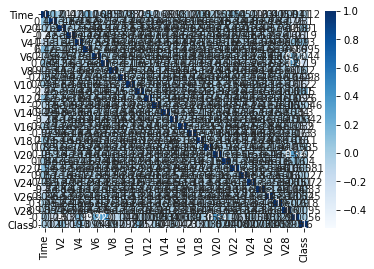

In [33]:
#상관관계
sns.heatmap(df.corr(), annot=True, fmt=".2g", cmap="Blues")
plt.show()# -> 의미가 있나? 잘 모르겠다

In [9]:
def GET_MY_SCORE(y_test, pred, proba, str=None):
    print("---------{}----------".format(str))
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    #rocauc = roc_auc_score(y_test, pred)
    auc = roc_auc_score(y_test, proba[:,1].reshape(-1,1))
    print("F1:{:.4f}=(정밀도:{:.4f} 재현율:{:.4f}) rocauc:{:.4f}".format(acc, f1, precision, recall, rocauc))
    cf_matrix = confusion_matrix(y_test, pred)
    print(cf_matrix)

In [ ]:
def CHART_HEATMAP(df, topn=0):
    plt.figure(figsize=(10.6))
    if topn>0 :
        sns.heat.map(df.corr().nlargest(topn), annot=True, fmt=".2g", cmap="Blues") #상위 몇개 보여줘
    elif topn<0 :
        sns.heat.map(df.corr().nsmallest(-1*topn), annot=True, fmt=".2g", cmap="Blues") #음수->양수 위해 -곱함
    else 
        sns.heat.map(df.corr(), annot=True, fmt=".2g", cmap="Blues")
    plt.show()

In [ ]:
#CHART_HEATMAP(df, 5)
#CHART_HEATMAP(df, -5)
#CHART_HEATMAP(df)

In [10]:
def SPLIT_FIT_PREDICT(model, X, y, str=None), rate=0.2) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=rate, random_state=121)
    model.fit(X_train, y_train)
    pred = rf_model.predict(X_test)
    proba = rf_model.predict(X_test)
    GET_MY_SCORE(y_test, pred, proba, str)
# rf_model = RandomForestClassifier()
# SPLIT_FIT_PREDICT(rf_model, X, y, str="최초점수", 0.5) 

In [ ]:
def CROSS_VALIDATION(model, X, y, cv=5):
    my_score={"acc":"accuracy", "f1":"f1"}
    score_list = cross_validate(model, X, y, scoring=my_score, cv=5, verbose=0)
    score_df = pd.DataFrame(score_list)
    print("cross_validation 평균 정확도", score_df["test_acc"].mean())
    print("cross_validation 평균 f1", score_df["test_f1"].mean())
#CROSS_VALIDATIONA(model, X, y)

In [ ]:
def GRIDSEARCHCV(my_hyper_param, model, X_train, y_train):
    my_score={"acc":"accuracy", "f1":"f1"}
    gcv_model = GridSearchCV(rf_model, param_grid=my_hyper_param, scoring=my_score, refit="f1", cv=5, verbose=0)
    my_hyper_param = { "n_estimators"      : [100,300], # 랜덤 포레스트 안의 결정 트리 갯수 #default:100
                    "max_depth"        : [3,5,7,9], #최대 tree depth
                    "min_samples_leaf" : [1,3,5], #최소한으로 말단 노드 몇개 줄지 정함
                    "random_state"    :  [121,] #bootstrapping : 복원추출(나온번호 또 허용될 수 있음)
                } #randomforest의 parameter #랜덤포레스트가 가질 수 있는 파라미터를 여기에 지정해서 넣으면 됨
    gcv_model.fit(X_train, y_train)
    print("best_estimator_", gcv_model.best_estimator_)
    print("best_params_",    gcv_model.best_params_) #제일 좋았던 파라미터
    print("best_score_",     gcv_model.best_score_) #제일 잘나온 점수
    print("GridSearchCV 평균 정확도 : " , gcv_model.cv_results_["mean_test_acc"].mean())  #result값에서 바로 빼내도 됨 #mean_test_(본인의score키값)
    print("GridSearchCV 평균 F1 : "    , gcv_model.cv_results_["mean_test_f1"].mean()) #GridSearch의 결과는 cv_results_속성에 있음

In [ ]:
#outlier 확인
def GET_OUTLIER_IDX(df=None, column=None):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    Q1 = np.percentile(df[column].values, 25)
    Q3 = np.percentile(df[column].values, 75)
    IQR = Q3 - Q1
    IQR_weight = IQR * 1.5
    minimum = Q1 - IQR_weight
    maximum = Q3 + IQR_weight
    outlier_idx = df[column][(df[column] < minimum) | (df[column] > maximum)].index #minimum보다 작은 or  maximum보다 큰 인덱스 다 가져오기
    return outlier_idx

# outlier_idx = get_outlier(df=df, column=col)
# print(col, outlier_idx)
# df.drop(outlier_idx, axis=0, inplace=True)
# 함수 사용해서 이상치 값 삭제
numeric_columns = df.dtypes[df.dtypes!='object'].index #object를 뺀 컬럼만 돌려야함
for i, col in enumerate(numeric_columns) :
    outlier_idx = get_outlier(df=df, column=col)
    print(col, outlier_idx)

In [ ]:
def ZERO_CHECK(X): 
    for col in X.columns:
    gcnt = X[col][X[col]==0].count()
    print(col, gcnt, np.round(gcnt/X.shape[0]*100, 2)) 

In [ ]:
def NULL_CHECK(X): 
    #print(df.isnull().sum())
    for col in X.columns:
    gcnt = X[col][X[col]==np.nan].count()
    print(col, gcnt, np.round(gcnt/X.shape[0]*100, 2)) 

In [ ]:
def GROUP_FILLNA_mean(bycol, cols, tcol): #평균값 채우기 위한?
    dict = df.groupby(by=[bycol])[cols].mean().astype(np.int32).to_dict()
    fill_mean_func = lambda gname: gname.fillna(dict['bycol'][gname[tcol]])
    df = df.groupby(bycol).apply(fill_mean_func)

#GROUP_FILLNA_MEAN("Name2", ["Name2", "Age"], "name")

In [ ]:
def DF_REPLACE(df, a, b):  #df에서 a를 b로 바꿔줘
    target_df = target_df.replace(a, b) #df의 컬럼리스트 준 후 바꾸기
    return target_df
#DF_REPLACE(X["BMI"], 0, 99)

In [ ]:
def SCALER():
    pass
# scaler = StandardScaler()
# X_scaler = scaler.fit_transform(X)

In [ ]:
def CHART_PRECISION_RECALL_CURV(y_test, proba):
    precision, recall, th = precision_recall_curve(y_test, proba[:,1]) 
    print(len(precision), len(recall), len(th)) 
    plt.plot(th, precision[:len(th)], label="preicision")
    plt.plot(th, recall[:len(th)], label="recall")
    plt.xlabel("threshold")
    plt.ylabel("precision & recall value")
    plt.legend()    #plt.legend(["precision", "recall"])
    plt.grid()
    plt.show()

In [ ]:
def CHART_ROC_CURV(y_test, proba):
    fpr, tpr, th = roc_curve(y_test, proba[:,1])
    auc = roc_auc_score(y_test, proba[:, 1].reshape(-1, 1))
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0,1], [0,1], label='th:0.5')
    plt.title(auc)
    plt.xlabel("FPR")
    plt.ylabel("TPR(recall)")
    plt.grid()
    plt.show()

In [ ]:
fpr, tpr, th = roc_curve(y_test, proba[:,1])
auc = roc_auc_score(y_test, proba[:, 1].reshape(-1, 1))
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1], [0,1], label='th:0.5')
plt.title(auc)
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.grid()
#plt.show()
